# Classification on Liver Disorders Dataset with Artificial Neural Networks

1. Data Preprocessing and quick analysis
2. Building ANN
3. Making Predictions So let's get started!

## 1. PreProcessing Dataset

### Import Libraries  and Load the dataset

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import math
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# load dataset
dataset = pd.read_csv("bupa.csv")

#dataset.head()

ModuleNotFoundError: No module named 'pandas'

###  Initialize Random Number Generator

In [27]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


### Data Exploration and Data Quality

In [28]:
#Method For Data Exporation

def exploreData(dataframe):
    # Preview dataset
    print("Dataset Head")
    print(dataframe.head(3))
    print("--" * 50)
    
    # Features in dataset
    print("Dataset Atrributes")
    print(dataframe.columns.values)
    print("--" * 50)
    
     # view distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(dataframe.describe())
    print("--" * 50)
    
    # View How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(dataframe.info())
    print("--" * 50)
    
    # view distribution of categorical features across the data set
#     print("Dataset Categorical Features")
#     print(dataframe.describe(include=['O']))
#     print("--" * 50)
        
    #Checking for missing values
    print("Check for Missing Values")
    print(dataframe.isnull().sum())
    print("--" * 50)

     #Get number of instances and number of attributes
    print("Number of Instances and Attributes")
    print(dataframe.shape)
    print("--" * 50)
    
exploreData(dataset)
# Distribution of Output Variable
#dataset['diagnosis'].value_counts()

Dataset Head
   85  92  45  27  31  0.0  1
0  85  64  59  32  23  0.0  2
1  86  54  33  16  54  0.0  2
2  91  78  34  24  36  0.0  2
----------------------------------------------------------------------------------------------------
Dataset Atrributes
['85' '92' '45' '27' '31' '0.0' '1']
----------------------------------------------------------------------------------------------------
Dataset Numerical Features
               85          92          45          27          31         0.0  \
count  344.000000  344.000000  344.000000  344.000000  344.000000  344.000000   
mean    90.174419   69.805233   30.363372   24.636628   38.305233    3.465116   
std      4.445830   18.335388   19.524790   10.078349   39.309824    3.337472   
min     65.000000   23.000000    4.000000    5.000000    5.000000    0.000000   
25%     87.000000   57.000000   19.000000   19.000000   15.000000    0.500000   
50%     90.000000   67.000000   26.000000   23.000000   24.500000    3.000000   
75%     93.0000

### Observations and Fixes
We have 345 instances of data with 7 columns(attributes).
- All fields in our dataset are numeric
- Our data does not contain any missing values. :) 

#### Aside
In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [40]:
#Get all features 
#X = dataset.drop(['0.0'], axis=1)
X = dataset.iloc[:,:6]
#print(X[100:110])
# Get second column which contains the outcomes(Benign and Malignant)
y = dataset.iloc[:,6]

### Encode Output

In [41]:
# encode class values as integers
print("Before encoding: ")
print(y[100:110]) 

labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

print("\nAfter encoding: ")
print(y[100:110])

Before encoding: 
100    2
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    2
109    2
Name: 1, dtype: int64

After encoding: 
[1 0 0 0 0 0 0 0 1 1]


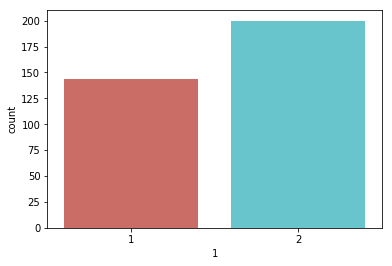

<Figure size 432x288 with 0 Axes>

In [64]:
#Checking if data is unbalanced. Output is 60:40 hence not bad
sns.countplot(x='1',data=dataset,palette='hls')
plt.show()
plt.savefig('count_plot')

### Feature Scaling (To be edited)
Now let's apply features scaling. Scaling ensures that just because some features are big, the model won't lead to using them as a main predictor

In [68]:
#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

## 2. Build ANN

### Define the neural network model

input_dim - number of columns of the dataset

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

In [69]:
# define baseline model
def baseline_model():
    # Initialising the ANN
    model = Sequential()
    # Adding the input layer and first hidden layer
    model.add(Dense(8, kernel_initializer="uniform", activation = 'relu', input_dim = 6))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate = 0.1))
    
    # Adding the second hidden layer
    model.add(Dense(8, kernel_initializer="uniform", activation = 'relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate = 0.1))
    
    # Adding the second hidden layer
    model.add(Dense(8, kernel_initializer="uniform", activation = 'relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate = 0.1))
    
    # Adding the second hidden layer
    model.add(Dense(8, kernel_initializer="uniform", activation = 'relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate = 0.1))
    
    # Adding the second hidden layer
    model.add(Dense(8, kernel_initializer="uniform", activation = 'relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate = 0.1))
    
    # Adding the output layer
    #classifier.add(Dense(2, init='uniform', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer="uniform", activation = 'sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating our KerasClassifier for use in scikit-learn
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

### Performing k-fold cross validation

In [70]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

### Evaluating the model with k-fold cross validation

In [71]:
#Evaluating out estimator on our dataset using 10-fold cross valiation
results = cross_val_score(estimator, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 58.11% (5.48%)


In [72]:
accuracy = results.mean()*100
error = results.std()*100
print("Accuracy: %.2f%% (%.2f%%)" % (accuracy, error))

Accuracy: 58.11% (5.48%)


### Getting the confusion matrix

In [56]:
#Get our result predictions 
y_pred = cross_val_predict(estimator, X, y, cv=kfold)
#Get our confusion matrix
conf_mat = confusion_matrix(y, y_pred)
class_report = classification_report(y,y_pred)
print(conf_mat)
print(class_report)

[[ 78  66]
 [ 50 150]]
             precision    recall  f1-score   support

          0       0.61      0.54      0.57       144
          1       0.69      0.75      0.72       200

avg / total       0.66      0.66      0.66       344



### Transforming to a plot

In [58]:
#Getting Accuracy, Specificity and Sensitivity from the confusion matrix
total1=sum(sum(conf_mat))
#Accuracy
#accuracy=((conf_mat[0,0]+conf_mat[1,1])/total1)*100

#accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis = 0)
#Sensitivity
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])*100
#sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis = 1)
#Specificity
specificity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])*100

print(accuracy)
print(sensitivity)
print(specificity)
#print("[{} {} {}]".format(round(specificity1, 2), round(specificity2, 2),round(specificity3, 2)))

66.27906976744185
54.166666666666664
75.0


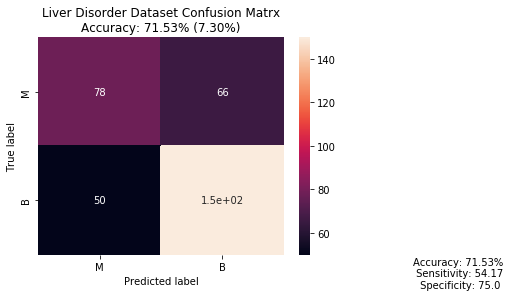

In [61]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(conf_mat,
                     index = ['M','B'], 
                     columns = ['M','B'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Liver Disorder Dataset Confusion Matrx\nAccuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: {} '.format(round(accuracy, 2),round(sensitivity, 2),round(specificity, 2)), horizontalalignment='right')
plt.show()